# Практична робота №3
### Студента групи МІТ-31
### Переверзева Олексія

Крок 1: Генерація даних

In [22]:
import pandas as pd
import numpy as np

np.random.seed(0)
n_samples = 1000 #К-ть спостережень

data={
    'Площа житла': np.random.randint(50, 201, size=n_samples),
    'Кількість спалень': np.random.randint(1, 6, size=n_samples),
    'Відстань до центру міста': np.random.randint(1, 21, size=n_samples)
}

noise = np.random.normal(0, 2, n_samples) #Похибка

data['Ціна житла'] = 10 * data['Площа житла'] + 5 * data['Кількість спалень'] - 2 * data['Відстань до центру міста'] + noise

df = pd.DataFrame(data)

df.to_csv('data.csv', index=False)
data = pd.read_csv('data.csv')

print("\nСтатистика даних:")
print(data.describe())


Статистика даних:
       Площа житла  Кількість спалень  Відстань до центру міста   Ціна житла
count  1000.000000        1000.000000               1000.000000  1000.000000
mean    127.743000           3.032000                 10.613000  1271.342715
std      43.476536           1.398188                  5.553744   435.522135
min      50.000000           1.000000                  1.000000   468.607764
25%      89.000000           2.000000                  6.000000   882.342635
50%     132.000000           3.000000                 11.000000  1311.273047
75%     165.000000           4.000000                 15.000000  1648.112100
max     200.000000           5.000000                 20.000000  2014.925556


In [23]:
data

,Площа житла,Кількість спалень,Відстань до центру міста,Ціна житла
0,97,4,9,969.719365
1,167,4,16,1651.711751
2,117,4,7,1172.291599
3,153,1,11,1512.483888
4,59,1,2,590.434916
...,...,...,...,...
995,184,1,8,1827.466707
996,82,5,5,832.939862
997,131,5,19,1296.920616
998,169,5,16,1683.454031


Крок 2: Розділення даних

In [24]:
#Розділення даних на навчальний та тестовий набори в співвідношенні 80% - 20%.

data = data.dropna()

X = data.drop('Ціна житла', axis=1)
y = data['Ціна житла']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [25]:
X_test

,Площа житла,Кількість спалень,Відстань до центру міста
286,82,5,16
402,76,1,17
253,142,3,7
4,59,1,2
372,188,5,13
...,...,...,...
358,187,1,16
626,168,3,12
207,111,4,13
714,160,5,10


Крок 3: Побудова моделі регресії

In [26]:
from sklearn.linear_model import LinearRegression as lr
lr_model = lr()
lr_model.fit(X_train, y_train)

LinearRegression()

Крок 4: Оцінка моделі

In [27]:
y_pred_lr = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("R2: ", r2_score(y_test, y_pred_lr))

MSE:  3.62016402311455
R2:  0.9999814048620042


Крок 5: Візуалізація результатів

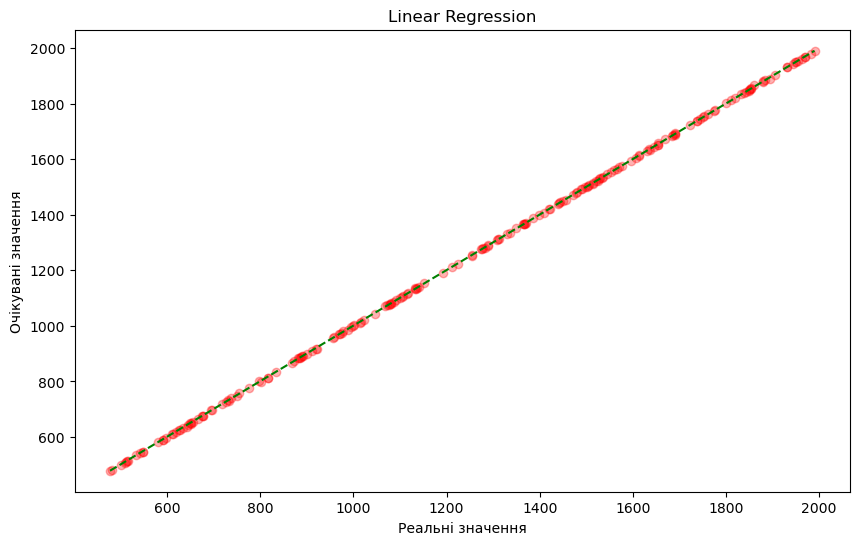

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("Linear Regression")
plt.xlabel("Реальні значення")
plt.ylabel("Очікувані значення")
plt.scatter(y_test, y_pred_lr, c='red', alpha=0.3)

plt.plot([min(y_test), max(y_test)], [min(y_pred_lr), max(y_pred_lr)], ls='--', c ='green')

plt.show()

Крок 6: Висновки

Згідно досить гарних показників оцінки нашої моделі (MSE = 3.62, R2 = 0.99) можна стверджувати що здатність моделі передбачати ціни на житло на основі наявних характеристик є досить гарною, як і точність передбачених показнків. На графіку видно, що практично всі передбачені значення знаходяться на тій самій лінії, що означає що результати є практично ідеальні.